In [1]:
%matplotlib inline


# OT for domain adaptation


This example introduces a domain adaptation in a 2D setting and the 4 OTDA
approaches currently supported in POT.




In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot

Generate data
-------------



In [3]:
n_source_samples = 150
n_target_samples = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_source_samples)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_target_samples)

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



In [4]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xs, ys=ys, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization l1l2
ot_l1l2 = ot.da.SinkhornL1l2Transport(reg_e=1e-1, reg_cl=2e0, max_iter=20,
                                      verbose=True)
ot_l1l2.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xs)
transp_Xs_l1l2 = ot_l1l2.transform(Xs=Xs)

It.  |Loss        |Delta loss
--------------------------------
    0|9.537526e+00|0.000000e+00
    1|2.505426e+00|-2.806748e+00
    2|2.264025e+00|-1.066249e-01
    3|2.210620e+00|-2.415841e-02
    4|2.191601e+00|-8.677880e-03
    5|2.182712e+00|-4.072416e-03
    6|2.178054e+00|-2.138572e-03
    7|2.176320e+00|-7.971427e-04
    8|2.174237e+00|-9.578098e-04
    9|2.172978e+00|-5.792305e-04
   10|2.172514e+00|-2.138295e-04
   11|2.171279e+00|-5.689220e-04
   12|2.169799e+00|-6.819885e-04
   13|2.169215e+00|-2.692594e-04
   14|2.168810e+00|-1.868050e-04
   15|2.168289e+00|-2.401519e-04
   16|2.168018e+00|-1.249509e-04
   17|2.167885e+00|-6.124717e-05
   18|2.167623e+00|-1.211692e-04
   19|2.167335e+00|-1.327875e-04
It.  |Loss        |Delta loss
--------------------------------
   20|2.166808e+00|-2.432572e-04


Fig 1 : plots source and target samples
---------------------------------------



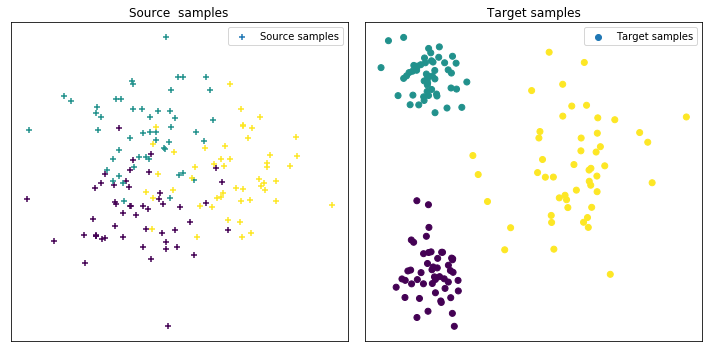

In [5]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

Fig 2 : plot optimal couplings and transported samples
------------------------------------------------------



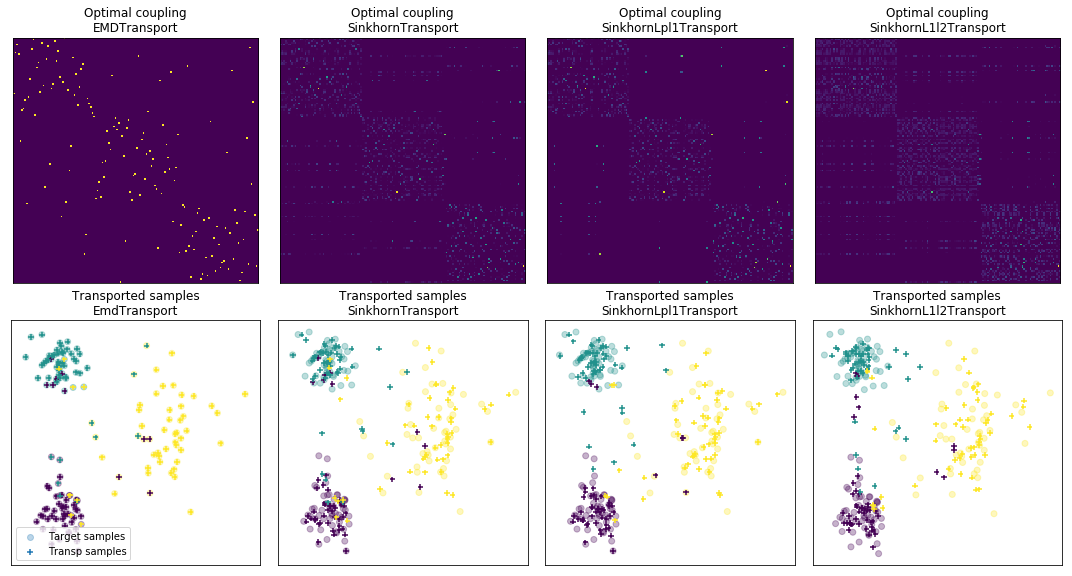

In [6]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 4, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.subplot(2, 4, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 4, 3)
pl.imshow(ot_lpl1.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornLpl1Transport')

pl.subplot(2, 4, 4)
pl.imshow(ot_l1l2.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornL1l2Transport')

pl.subplot(2, 4, 5)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 4, 6)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 4, 7)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornLpl1Transport')

pl.subplot(2, 4, 8)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_l1l2[:, 0], transp_Xs_l1l2[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornL1l2Transport')
pl.tight_layout()

pl.show()